<h2>Importing libraries</h2>
Now we're going to add some libraries for feature extraction

In [41]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import os
import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

<h2>Preprocessing dataset</h2>

In [42]:
X = pd.read_csv('dataset_advanced.csv')

filenames = X['filename']
X.drop(['filename'],axis=1, inplace=True)

X_scaled = MinMaxScaler().fit_transform(X=X)
print(X_scaled)

[[0.29926651 0.14133597 0.4757166  ... 0.36500164 0.43707843 0.26305436]
 [0.41483731 0.07690762 0.39306139 ... 0.36184949 0.35707246 0.25367657]
 [0.2735686  0.15089286 0.35964005 ... 0.29598113 0.37759518 0.28601648]
 ...
 [0.46097794 0.00267165 0.46161462 ... 0.46856052 0.45728931 0.38224898]
 [0.34460025 0.00451842 0.50586806 ... 0.38210133 0.34405289 0.27723581]
 [0.11556431 0.01042511 0.68807307 ... 0.69541127 0.59639437 0.3171378 ]]


<h2>Clustering</h2>

In [49]:
n_clusters = 4
clusters = KMeans(n_clusters=n_clusters, random_state=0).fit(X_scaled)
clusters.labels_

array([2, 3, 0, 2, 2, 3, 0, 1, 2, 1, 3, 3, 2, 2, 0, 1, 0, 3, 2, 1, 0, 2,
       0, 1, 1, 3, 2, 3, 3, 1, 0, 3, 3, 0, 1, 0, 0, 3, 3, 2, 3, 0, 1, 0,
       0, 0, 1, 3, 3, 3, 1, 0, 0, 3, 0, 0, 0, 1, 3, 3, 1, 0, 3, 1, 3, 3,
       0, 3, 0, 0, 1, 3, 1, 1, 0, 1, 1, 1, 0, 3, 3, 0, 0, 1, 0, 3, 3, 1,
       1, 0, 2, 3, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 2,
       2, 1, 2, 2, 0, 2, 0, 0, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 3, 3, 1, 2,
       1, 2, 1, 2, 2, 1, 1, 2, 3, 1, 2, 3, 2, 1, 2, 0, 1, 2, 2, 0, 0, 1,
       0, 3, 1, 1, 1, 0, 0, 0, 0, 3, 1, 0, 3, 3, 1, 1, 1, 0, 1, 1, 0, 1,
       2, 1, 1, 2, 3, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 3, 0, 2, 2, 0, 0,
       2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 0, 0, 1, 0, 0, 2, 0, 2, 2,
       2, 3, 0, 3, 2, 0, 2, 2, 2, 3, 2, 2, 2, 0, 2, 1, 1, 2, 2, 3, 0, 2,
       1, 3, 2, 2, 2, 0, 3, 1, 1, 3, 0, 0, 3, 3, 0, 3, 0, 3, 1, 0, 3, 0,
       1, 0, 3, 1, 0, 1, 1, 1, 1, 3, 3, 3, 3, 1, 2,

<h2>Decreasing feature size for visualisation purposes</h2>

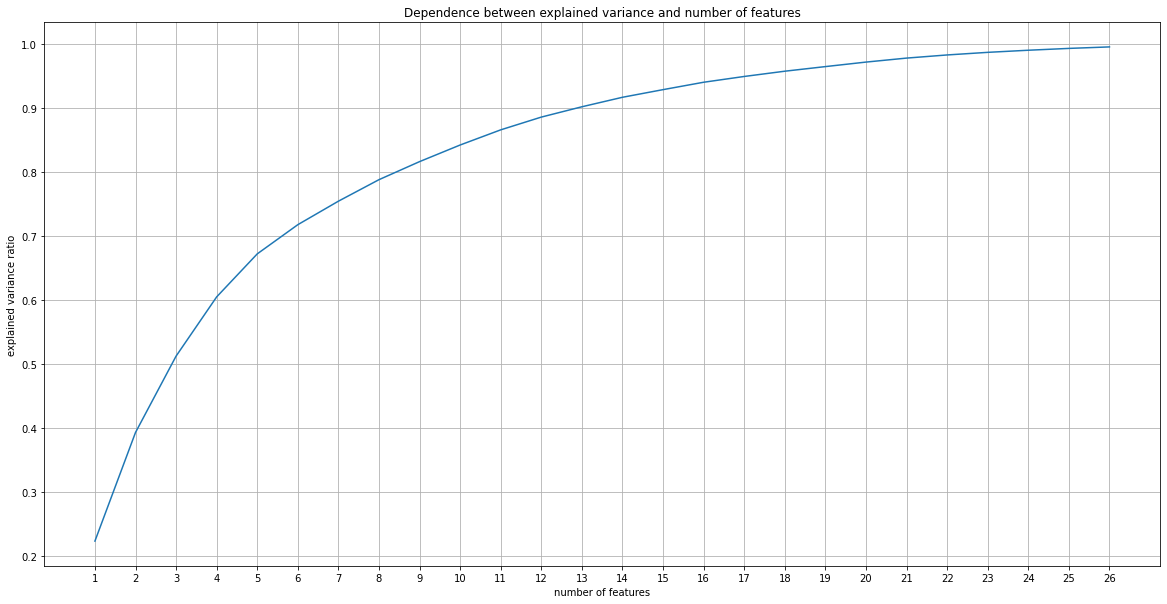

In [50]:
pca = PCA(n_components=3)

plotGroups = pca.fit_transform(X_scaled)
centers = pca.transform(clusters.cluster_centers_)
#print(pca.explained_variance_ratio_)

plt.figure(figsize=(20,10))
expVar = []
for i in range(1, 27):
    pca1 = PCA(n_components=i)
    pca1.fit_transform(X_scaled)
    expVar.append(pca1.explained_variance_ratio_.sum())
plt.plot(range(1, 27), expVar)
plt.xticks(range(1,27))
plt.xlabel('number of features')
plt.ylabel('explained variance ratio')
plt.title('Dependence between explained variance and number of features')
plt.grid(True)

<h2>2d visualisation </h2>

Text(0.5, 1.0, 'created clusters')

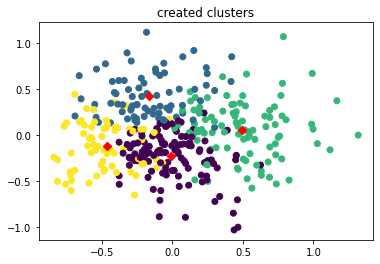

In [51]:
plt.scatter(plotGroups[:,0], plotGroups[:,1], c=clusters.labels_)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color = 'red')
plt.title('created clusters')

<h2>3d visualisation</h2>

In [52]:
#Make Plotly figure
import plotly
import plotly.graph_objs as go

fig1 = go.Scatter3d(x=plotGroups[:,0],
                    y=plotGroups[:,1],
                    z=plotGroups[:,2],
                    marker=dict(opacity=0.9,
                                reversescale=True,
                                size=5,
                                color=clusters.labels_,
                                #colorscale = 'HSV',
                                line=dict (width=1)),
                    text=filenames,
                    line=dict (width=5),
                    mode='markers')

fig2 = go.Scatter3d(x=centers[:,0],
                    y=centers[:,1],
                    z=centers[:,2],
                    marker=dict(opacity=0.9,
                                reversescale=True,
                                size=8,
                                color=list(range(1,n_clusters+1)),
                                #colorscale = 'IceFire',
                                line=dict(width=10)),
                    text=list(range(1,n_clusters+1)),

                    mode='markers')
#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict(title="1 feature"),
                                yaxis=dict(title="2 feature"),
                                zaxis=dict(title="3 feature")),)

#Plot and save html
plotly.offline.plot({"data": [fig1, fig2],
                     "layout": mylayout},
                     auto_open=True,
                     filename="3DPlot.html")

'3DPlot.html'

Generating pretty output with cluster number and song name

In [54]:
tracklist1 = pd.read_csv('set1_tracklist.csv')
output = tracklist1.drop(['Emotion'], axis = 1)
output.set_index('Nro', inplace=True)
output['cluster'] = clusters.labels_
output.sort_values(by='cluster', inplace=True)
output.to_csv('clusters_of_music.csv')
output

,Album name,Track,Min:Sec,cluster
Nro,,,,
115,The Missing,3,02:45-03:06,0
101,Shallow Grave,7,00:00-00:15,0
99,Dracula,5,02:12-02:28,0
98,Road to Perdition,6,00:34-00:49,0
177,Cape Fear,2,01:25-01:40,0
...,...,...,...,...
190,Pride and Prejudice,9,00:01-00:21,3
299,Oliver Twist,8,00:14-00:30,3
298,Mother of Mine,1,00:00-00:15,3
